<a href="https://colab.research.google.com/github/IsabelaAyres/datascience/blob/main/MVP_Machine_Learning_and_Analytics/MVP_Machine_Learning_Isabela_Ayres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP de Machine Learning & Analytics

>**PUC-Rio**
>
>**Postgraduate Course in Data Science and Analytics**
>
>**Student: Isabela Ayres**


# MACHINE LEARNING


---

Using Classification for Credit Card Fraud Detection.

## 1. Problem Definition


### 1.1 Context

Within Machine Learning, there are various methods and techniques, and two of the most used are classification and regression. Classification involves assigning labels to a dataset based on specific features or attributes. Regression, on the other hand, aims to predict a continuous value based on independent variables.

In this work, the focus will be on using classification to tackle a problem that affects millions of people worldwide: credit card fraud.

By applying classification techniques, it's possible to analyze patterns and behaviors present in transaction data, taking into account information such as purchase amount, geographical location, customer history, and other relevant factors. Based on these identified patterns, a Machine Learning model can be trained to classify transactions as legitimate or fraudulent, allowing for faster and more efficient detection of suspicious activities.

### 1.2 Dataset

The dataset used in this project will be the fraud transactions dataset, containing fictional data to simulate credit card purchase scenarios, with the aim of classifying transactions as Genuine or Fraudulent.

The dataset can be accessed [here](https://www.kaggle.com/datasets/dermisfit/fraud-transactions-dataset?select=fraudTrain.csv).


### 1.3 Attributes

The dataset contains 80,000 instances and 23 attributes, as described below.

1. **trans_date_trans_time:** transaction date and time
2. **cc_num:** credit card number
3. **merchant:** merchant being paid
4. **category:** category of the merchant's business
5. **amt:** amount in US dollars
6. **first:** cardholder's first name
7. **last:** cardholder's last name
8. **gender:** cardholder's gender
9. **street:** cardholder's street address
10. **city:** cardholder's city of residence
11. **state:** cardholder's state of residence
12. **zip:** cardholder's zip code
13. **lat:** cardholder's latitude
14. **long:** cardholder's longitude
15. **city_pop:** city population
16. **job:** cardholder's occupation
17. **dob:** cardholder's date of birth
18. **trans_num:** transaction id
19. **unix_time:** Unix time, calculated hours since 1970
20. **merch_lat:** merchant's latitude
21. **merch_long:** merchant's longitude
22. **is_fraud:** if the transaction is fraudulent (1) or not (0)
23. **id:** record identification in the dataset



## 2. Data Preparation

### 2.1 Imports

Starting with the importation of the libraries to be used.

In [1]:
# Configuration to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score

### 2.2 Loading

The Pandas package (Python Data Analysis Library) will be used to load data from an online available .xlsx file.

In [2]:
# Loading a csv file using Pandas via a URL

# Specify the URL for importing the dataset
url = "https://raw.githubusercontent.com/IsabelaAyres/datascience/main/MVP_Machine_Learning_and_Analytics/fraud.xlsx"

# Read the file
df = pd.read_excel(url)
df.head()

,id,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867240,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,339659.0,-8.093550e+05,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,3.398639e+07,-81200714.0,0
1,1,2020-06-21 12:14:33,3573030041201290,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,403207.0,-1.104360e+05,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,3.945050e+16,-109960431.0,0
2,2,2020-06-21 12:14:53,3598215285024750,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,406729.0,-7.353650e+05,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,4.049581e+06,-74196111.0,0
3,3,2020-06-21 12:15:15,3591919803438420,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,285697.0,-8.081910e+05,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,2.881240e+16,-80883061.0,0
4,4,2020-06-21 12:15:17,3526826139003040,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,442529.0,-8.501700e+15,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,4.495915e+07,-85884734.0,0


In [3]:
# Show the last 10 lines of the dataset
df.tail(10)

,id,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
79990,79990,2020-07-19 12:21:57,3557442674264530,fraud_Balistreri-Nader,misc_pos,201.31,Angela,Edwards,F,486 Wilkins Pines,...,398013.0,-828125.0,460,"Lecturer, higher education",2004-06-19,86aadbcc0db7c8a73f6abba441eba3e4,1374236517,3.880628e+07,-8.181352e+06,0
79991,79991,2020-07-19 12:21:58,4260059589824230,"fraud_Schoen, Nienow and Bauch",personal_care,194.73,Aaron,Rogers,M,969 Huerta Path Apt. 270,...,428062.0,-1006215.0,4005,Network engineer,1945-03-15,f47052d3a95b5d5a00f7ddfe00bc017f,1374236518,4.272525e+16,-1.015327e+16,0
79992,79992,2020-07-19 12:22:08,503874407318,fraud_Lemke and Sons,travel,1.60,Andrew,Mcgee,M,4130 Tiffany Glen Apt. 562,...,295894.0,-985201.0,1595797,Exhibition designer,1975-12-28,9834afdf2cebe1c6fe7034494c081416,1374236528,2.889171e+07,-9.767689e+06,0
79993,79993,2020-07-19 12:22:50,3533012926413100,fraud_Keeling-Crist,misc_pos,253.15,Megan,Bernard,F,128 Nathan Ramp,...,432237.0,-751612.0,1684,IT trainer,1994-03-01,7a5a76dc410e877bedf0a8a83c0d8bd1,1374236570,4.375244e+07,-7.437007e+07,0
79994,79994,2020-07-19 12:23:00,213154573301411,fraud_Eichmann-Kilback,home,80.35,Christopher,Sheppard,M,39218 Baker Shoals,...,381981.0,-866821.0,965,Horticultural therapist,1982-02-10,94b23fa87020f579193cc6dc34d124c2,1374236580,3.746334e+16,-8.670475e+07,0
79995,79995,2020-07-19 12:24:58,371683116218417,fraud_Jacobi Inc,health_fitness,1.36,Debra,Becker,F,384 Jonathan Hills,...,405716.0,-743167.0,18459,Emergency planning/management officer,1929-03-19,5a8919f0560d6936069b0edf04f65690,1374236698,3.989493e+07,-7.369773e+07,0
79996,79996,2020-07-19 12:25:21,4561892980175,fraud_Nader-Maggio,personal_care,11.76,Jacqueline,Allen,F,166 Lisa Fords,...,39596.0,-861309.0,78968,Financial adviser,1968-02-10,2b2e42c8771bbc447d48642e887b15da,1374236721,4.024500e+16,-8.601224e+06,0
79997,79997,2020-07-19 12:25:31,2720433095629870,fraud_Renner Ltd,home,32.53,Mark,Wood,M,854 Walker Dale Suite 488,...,440575.0,-699656.0,3224,"Engineer, electronics",1997-08-22,18661fc99af762a26b2ee79368d2e4dd,1374236731,4.473255e+07,-7.093022e+07,0
79998,79998,2020-07-19 12:25:40,180017442990269,"fraud_Langosh, Wintheiser and Hyatt",food_dining,55.85,Michelle,Anderson,F,28311 Dennis Trace,...,426853.0,-738253.0,151022,"Designer, textile",1939-06-01,828d78ea523cede5697732018a613ab7,1374236740,4.356917e+06,-7.286098e+07,0
79999,79999,2020-07-19 12:25:49,3502088871723050,fraud_Schroeder Group,health_fitness,90.91,Scott,Martin,M,31472 Cody Place Suite 740,...,390298.0,-770793.0,19054,Operations geologist,1976-09-08,1e0a4d0172e0831f94c28a6ac8acce71,1374236749,3.952279e+07,-7.781671e+06,0


In [4]:
# Display dataset information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     80000 non-null  int64         
 1   trans_date_trans_time  80000 non-null  datetime64[ns]
 2   cc_num                 80000 non-null  int64         
 3   merchant               80000 non-null  object        
 4   category               80000 non-null  object        
 5   amt                    80000 non-null  float64       
 6   first                  80000 non-null  object        
 7   last                   80000 non-null  object        
 8   gender                 80000 non-null  object        
 9   street                 80000 non-null  object        
 10  city                   80000 non-null  object        
 11  state                  80000 non-null  object        
 12  zip                    80000 non-null  int64         
 13  l

In [5]:
# Checking for null values in the dataset
df.isnull().sum()

id                       0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [6]:
# Checking the total frauds amount
df_counts = df.is_fraud.value_counts().reset_index(name="Count").rename(columns={'index':'is_fraud'})
df_counts[df_counts["is_fraud"] == 1.0].Count
df_counts["Percentage"] = df_counts["Count"]/len(df) * 100
df_counts

,is_fraud,Count,Percentage
0,0,79697,99.62125
1,1,303,0.37875


### 2.3 Feature selection

Feature Selection is a process in Machine Learning where we pick the most important pieces of information from a bunch of data. Imagine you have a big list of data points, and you want to figure out which ones really matter.

We will begin the Feature Selection process by removing some unnecessary columns.

In [7]:
# Removing Unnecessary and Redundant Columns

df = df.drop('id',axis=1)
df = df.drop('first',axis=1)
df = df.drop('last',axis=1)
df = df.drop('street',axis=1)
df = df.drop('city',axis=1)
df = df.drop('state',axis=1)
df = df.drop('trans_num',axis=1)

df

,trans_date_trans_time,cc_num,merchant,category,amt,gender,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867240,fraud_Kirlin and Sons,personal_care,2.86,M,29209,339659.0,-8.093550e+05,333497,Mechanical engineer,1968-03-19,1371816865,3.398639e+07,-81200714.0,0
1,2020-06-21 12:14:33,3573030041201290,fraud_Sporer-Keebler,personal_care,29.84,F,84002,403207.0,-1.104360e+05,302,"Sales professional, IT",1990-01-17,1371816873,3.945050e+16,-109960431.0,0
2,2020-06-21 12:14:53,3598215285024750,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,11710,406729.0,-7.353650e+05,34496,"Librarian, public",1970-10-21,1371816893,4.049581e+06,-74196111.0,0
3,2020-06-21 12:15:15,3591919803438420,fraud_Haley Group,misc_pos,60.05,M,32780,285697.0,-8.081910e+05,54767,Set designer,1987-07-25,1371816915,2.881240e+16,-80883061.0,0
4,2020-06-21 12:15:17,3526826139003040,fraud_Johnston-Casper,travel,3.19,M,49632,442529.0,-8.501700e+15,1126,Furniture designer,1955-07-06,1371816917,4.495915e+07,-85884734.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,2020-07-19 12:24:58,371683116218417,fraud_Jacobi Inc,health_fitness,1.36,F,8830,405716.0,-7.431670e+05,18459,Emergency planning/management officer,1929-03-19,1374236698,3.989493e+07,-73697728.0,0
79996,2020-07-19 12:25:21,4561892980175,fraud_Nader-Maggio,personal_care,11.76,F,46143,39596.0,-8.613090e+05,78968,Financial adviser,1968-02-10,1374236721,4.024500e+16,-8601224.0,0
79997,2020-07-19 12:25:31,2720433095629870,fraud_Renner Ltd,home,32.53,M,4287,440575.0,-6.996560e+05,3224,"Engineer, electronics",1997-08-22,1374236731,4.473255e+07,-70930223.0,0
79998,2020-07-19 12:25:40,180017442990269,"fraud_Langosh, Wintheiser and Hyatt",food_dining,55.85,F,12222,426853.0,-7.382530e+05,151022,"Designer, textile",1939-06-01,1374236740,4.356917e+06,-72860978.0,0


Now, let's apply a Categorical Transformation so that we can consider Categorical variables in the model.

Categorical Transformations convert words or labels into numbers so computers can understand. For example, turning "red" into "1" and "blue" into "2." This helps algorithms work with categories like colors, making data useful for predictions.

In [8]:
# Categorical transformations

# Separating the columns for transformation
cat_cols = ['merchant', 'category', 'job', 'gender', 'trans_date_trans_time', 'dob']

# Defining the transformer as Label Encoding
le = LabelEncoder()

# Transforming the data
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

Next, we will apply three Feature Selection methods to decide which attributes to use in the models.

In [11]:
# Data Preparation

# Separation into training and testing sets (holdout)
array = df.values
X = array[:,0:15] # attributes
y = array[:,15] # target

**Method 1: SelectKBest**: is a method that helps pick the 'K' most important features (data aspects) for better predictions. It selects the ones with the strongest connection to the outcome, ignoring less relevant ones to improve model accuracy.

In [12]:
# Attribute selection using SelectKBest
best_var = SelectKBest(score_func=f_classif, k=4)

# Execute the scoring function on (X, y) and obtain the selected attributes
fit = best_var.fit(X, y)

# Reduce X to the selected attributes
features = fit.transform(X)

# Results
print('\nTotal original attributes:', X.shape[1])
print('\nTarget attributes:', features.shape[1])

# Display the original attributes
print("\nOriginal Attributes:", df.columns[0:15])

# Display the scores of each attribute and the top 4 chosen ones (with the highest scores)
np.set_printoptions(precision=3)
print("\nScores Original Attributes:", fit.scores_)
print("\nSelected Attributes:", best_var.get_feature_names_out(input_features=df.columns[0:15]))


Total original attributes: 15

Target attributes: 4

Original Attributes: Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'unix_time',
       'merch_lat', 'merch_long'],
      dtype='object')

Scores Original Attributes: [1.404e+00 1.060e+01 2.438e-03 2.356e+01 2.780e+03 7.836e-01 1.450e+01
 4.941e+01 7.957e+00 4.196e+00 4.257e+00 9.824e+00 1.303e+00 2.966e-02
 9.216e-01]

Selected Attributes: ['category' 'amt' 'zip' 'lat']


**Method 2: Recursive Feature Elimination**: is a technique that removes less important features one by one to find the best ones for better prediction accuracy. It repeatedly evaluates feature importance and trims those with the least impact on the model.

In [13]:
# Model creation
modelo = LogisticRegression(max_iter=200)

# Recursive Feature Elimination
rfe = RFE(modelo, n_features_to_select=4)
fit = rfe.fit(X, y)

# Printing the results
print("Original Attributes:", df.columns[0:15])

# Display the selected attributes (marked as True in "Selected Attributes"
# and with a value of 1 in "Attribute Ranking")
print("\nSelected Attributes: %s" % fit.support_)
print("\nRanking Attributes: %s" % fit.ranking_)
print("\nBest Attributes: %d" % fit.n_features_)
print("\nSelected Attibutes Names: %s" % fit.get_feature_names_out(input_features=df.columns[0:15]))

Original Attributes: Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'unix_time',
       'merch_lat', 'merch_long'],
      dtype='object')

Selected Attributes: [False False False False False False False False False False False  True
  True  True  True]

Ranking Attributes: [12 11 10  9  8  7  6  5  4  3  2  1  1  1  1]

Best Attributes: 4

Selected Attibutes Names: ['dob' 'unix_time' 'merch_lat' 'merch_long']


**Method 3: Attribute Importance with ExtraTrees**: is a method to figure out which features (data parts) are most crucial for predictions. It uses a decision tree-based algorithm to evaluate and rank features based on their impact on the model's accuracy.

In [14]:
# Model creation for attribute selection
modelo = ExtraTreesClassifier(n_estimators=100)
modelo.fit(X,y)

# Display the original attributes
print("\nOriginal Attributes:", df.columns[0:15])

# Display the importance score for each attribute (higher score means more important attribute).
print(modelo.feature_importances_)


Original Attributes: Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'unix_time',
       'merch_lat', 'merch_long'],
      dtype='object')
[0.076 0.052 0.042 0.055 0.278 0.012 0.052 0.064 0.043 0.049 0.054 0.056
 0.078 0.043 0.046]


> We observed that the SelectKBest and Recursive Feature Elimination methods return different attributes. Considering the Attribute Importance with ExtraTrees method, we were finally able to define the best attributes for application in the models, which are: 'amt,' 'trans_date_trans_time,' 'lat,' 'dob,' 'category,' and 'job.

In [15]:
# Selecting necessary columns for analysis
df_final = df[['amt', 'trans_date_trans_time', 'lat', 'dob', 'category', 'job', 'is_fraud']]

In [16]:
df_final

,amt,trans_date_trans_time,lat,dob,category,job,is_fraud
0,2.86,0,339659.0,370,10,275,0
1,29.84,1,403207.0,751,10,391,0
2,41.28,2,406729.0,412,5,259,0
3,60.05,3,285697.0,709,9,406,0
4,3.19,4,442529.0,175,13,196,0
...,...,...,...,...,...,...,...
79995,1.36,78531,405716.0,14,5,143,0
79996,11.76,78532,39596.0,369,10,187,0
79997,32.53,78533,440575.0,856,6,157,0
79998,55.85,78534,426853.0,54,1,122,0


## 3. Modeling and Training


In this step, we will split the data into training and test sets and apply different models for analysis.

In [19]:
# Data Preparation

# Split into training and testing sets (holdout)
array = df_final.values
X = array[:,0:6] # attributes
y = array[:,6] # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

# Creating folds for cross-validation
num_particoes = 10
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=10)

KNN: 0.997453 (0.000613)
CART: 0.997453 (0.000528)
NB: 0.976922 (0.002763)
SVM: 0.996312 (0.000734)


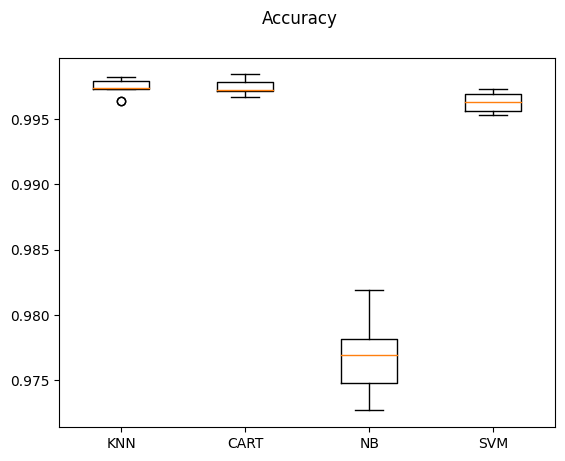

In [20]:
# Modeling

# Defining a global seed for this code cell
np.random.seed(10)

# Lists to store the models, results, and model names
models = []
results = []
names = []

# Preparing the models and adding them to a list
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Evaluating one model at a time
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy', error_score='raise')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

# Boxplot for model comparison
fig = plt.figure()
fig.suptitle('Accuracy')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

The accuracy of all tested models is generally quite high. However, it is important to note that our dataset has a significantly larger proportion of non-fraud cases compared to fraud cases - which is common for this situation. Our main goal is to deal with the class that has much fewer records, i.e., the fraud cases. In this context, accuracy is not the most suitable metric to evaluate the models' performance in predicting this class.

To make a better decision about the best model, we will use other metrics, such as the Confusion Matrix and Recall.

A **Confusion Matrix** is a table that helps assess the performance of a classification model. It shows how well the model predicted different categories by comparing actual results against predicted ones. It's crucial for evaluating model accuracy and errors.


**Recall** is the ability of a model to correctly identify all relevant instances among the total actual relevant instances. It measures how well the model avoids missing important results, and it's especially important in tasks where not missing any relevant information is crucial.

In [21]:
# Making predictions for each model

#KNN
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
predictionsKNN = KNN.predict(X_test)

#CART
CART = DecisionTreeClassifier()
CART.fit(X_train, y_train)
predictionsCART = CART.predict(X_test)

#NB
NB = GaussianNB()
NB.fit(X_train, y_train)
predictionsNB = NB.predict(X_test)

#SVM
SVM = SVC()
SVM.fit(X_train, y_train)
predictionsSVM = SVM.predict(X_test)

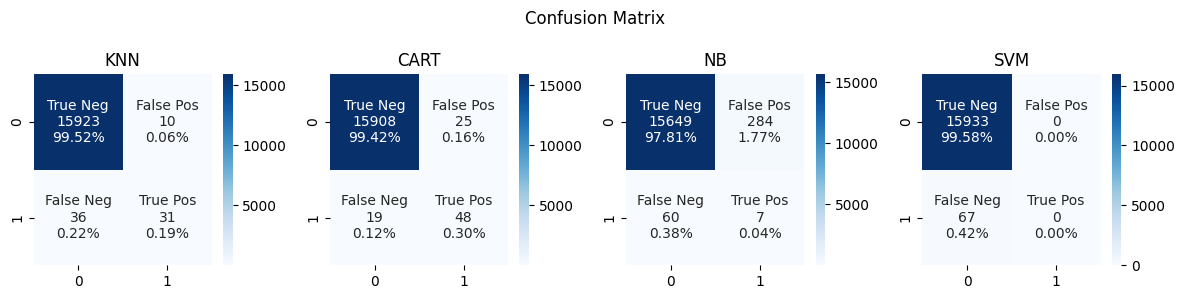

In [22]:
# Creating a confusion matrix for each model
cf_matrixKNN = confusion_matrix(y_test, predictionsKNN)
cf_matrixCART = confusion_matrix(y_test, predictionsCART)
cf_matrixNB = confusion_matrix(y_test, predictionsNB)
cf_matrixSVM = confusion_matrix(y_test, predictionsSVM)


# Viewing the formatted confusion matrix for each model
fig, ax = plt.subplots(figsize=(12,3), nrows=1, ncols=4)

# Creating formatted chart for KNN
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrixKNN.flatten()]

group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixKNN.flatten()/np.sum(cf_matrixKNN)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

axKNN = ax[0]
sns.heatmap(cf_matrixKNN, annot=labels, fmt='', cmap='Blues', ax=axKNN)
axKNN.set_title('KNN')

# Creating formatted chart for CART
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrixCART.flatten()]

group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixCART.flatten()/np.sum(cf_matrixCART)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

axCART = ax[1]
sns.heatmap(cf_matrixCART, annot=labels, fmt='', cmap='Blues', ax=axCART)
axCART.set_title('CART')

# Creating formatted chart for NB
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrixNB.flatten()]

group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixNB.flatten()/np.sum(cf_matrixNB)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

axNB = ax[2]
sns.heatmap(cf_matrixNB, annot=labels, fmt='', cmap='Blues', ax=axNB)
axNB.set_title('NB')

# Creating formatted chart for SVM
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrixSVM.flatten()]

group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixSVM.flatten()/np.sum(cf_matrixSVM)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

axSVM = ax[3]
sns.heatmap(cf_matrixSVM, annot=labels, fmt='', cmap='Blues', ax=axSVM)
axSVM.set_title('SVM')

fig.suptitle('Confusion Matrix')
plt.tight_layout()

In [23]:
# Calculating the recall for each model
predictions = []

predictions.append((recall_score(y_test, predictionsKNN)))
predictions.append((recall_score(y_test, predictionsCART)))
predictions.append((recall_score(y_test, predictionsNB)))
predictions.append((recall_score(y_test, predictionsSVM)))

print(predictions)

[0.4626865671641791, 0.7164179104477612, 0.1044776119402985, 0.0]


## 4. Results Evaluation


When evaluating the applied Machine Learning models, we can observe results that lead us to consider KNN as the most suitable in terms of accuracy. However, it is essential to take into account the specific characteristics of the business problem before making a final decision.

When dealing with fraud detection in credit card transactions, it is common to have a much larger number of legitimate transaction records than fraudulent ones. In this context, metrics such as the Confusion Matrix and Recall play a crucial role in a more accurate analysis of the models.

Through the analysis of the Confusion Matrix, we can see that the CART model has a higher percentage of True Positives. This means that this model has superior ability to correctly identify fraudulent transactions. Furthermore, the analysis of Recall, which measures the proportion of correctly identified fraudulent transactions relative to the total frauds, also confirms that the CART model delivers the best results.

Therefore, considering both the Confusion Matrix and Recall, we can conclude that the CART model is the most suitable for the problem at hand, due to its ability to identify a higher number of frauds compared to other models.